<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
features type:<class 'numpy.ndarray'>
target type:<class 'numpy.ndarray'>
(150, 4)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
[1 1 0]
      0    1    2    3  prediction
0   6.9  3.1  5.1  2.3           2
1   6.0  3.0  4.8  1.8           2
2   6.4  2.8  5.6  2.1           2
3   7.4  2.8  6.1  1.9           2
4   6.6  2.9  4.6  1.3           1
5   5.0  3.2  1.2  0.2           0
6   6.7  3.1  4.4  1.4           1
7   5.4  3.7  1.5  0.2           0
8   4.9  3.1  1

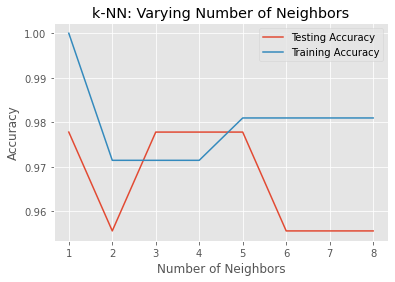

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#features: petal length, petal width, sepal length, sepal width
#target species: versicolor, virginica, setsoa
plt.style.use('ggplot')

iris=load_iris()

#bunch lets you use a python dict like an object
print(type(iris))
print(iris.keys())

#feature and target are numpy arrays
print('features type:' + str(type(iris.data)))
print('target type:' + str(type(iris.target)))
print(iris.data.shape)

X=iris.data
y=iris.target

df=pd.DataFrame(X,columns=iris.feature_names)
print(df.head(5))

#df.info()
#df.describe()
#pd.plotting.scatter_matrix(df,c=y)

knn=KNeighborsClassifier(algorithm='auto',
                         leaf_size=30,
                         metric='minkowski',
                         metric_params=None,
                         n_jobs=1,
                         n_neighbors=3,
                         p=2,
                         weights='uniform')

knn.fit(iris['data'],iris['target'])

#print(iris['data'])
#print(iris['target'])

X_new=np.array([[5.6,2.8,3.9,1.1],[5.7,2.6,3.8,1.3],[4.7,3.2,1.3,0.2]])
prediction=knn.predict(X_new);
print(prediction)

#random_state seeds the random generator.  Returns 4 arrays. stratify is assigned the label target
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=21, stratify=y)


knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

output=pd.DataFrame(X_test)
output['prediction']=y_pred
print(output)

list=output.values.tolist()
print(list)


#print(X_test)
#print(y_pred)
print("score:"+str(knn.score(X_test,y_test)))


neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))


for index, k in enumerate(neighbors):
    knn = KNeighborsClassifier(algorithm='auto',
                         leaf_size=30,
                         metric='minkowski',
                         metric_params=None,
                         n_jobs=1,
                         n_neighbors=k,
                         p=2,
                         weights='uniform')
    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    train_accuracy[index] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[index] = knn.score(X_test, y_test)    
    
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [3]:
knn=KNeighborsClassifier(algorithm='auto',
                         leaf_size=30,
                         metric='minkowski',
                         metric_params=None,
                         n_jobs=1,
                         n_neighbors=8,
                         p=2,
                         weights='uniform')

#print(X)
#print(y)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[23  0  0]
 [ 0 19  0]
 [ 0  1 17]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      1.00      0.97        19
           2       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



In [30]:
#from sklearn.metrics import roc_curve
#from sklearn.model_selection import cross_val_score

logreg=LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4, random_state=42)

logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)
my_score=logreg.score(X_test,y_test)
print(my_score)

y_pred_prob=logreg.predict_proba(X_test)[:,1]
#roc_auc_score(y_test,y_pred_prob)
cv_scores=cross_val_score(logreg,X,y,cv=5)
print(cv_scores)


1.0
[0.96666667 1.         0.93333333 0.96666667 1.        ]


C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
